In [3]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
data=pd.read_csv("E:\Data\Sem 6\Predictive Modelling\Project\\train.csv")

In [18]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
# check datatypes, shape,null values
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_Licens

In [9]:
#Statistical Summary of Numeric Variables
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<AxesSubplot:xlabel='Response', ylabel='count'>

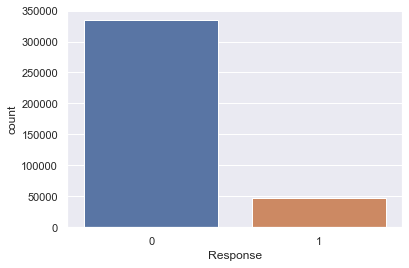

In [10]:
sns.set_theme(style="darkgrid")
sns.countplot(data['Response'],data=data)

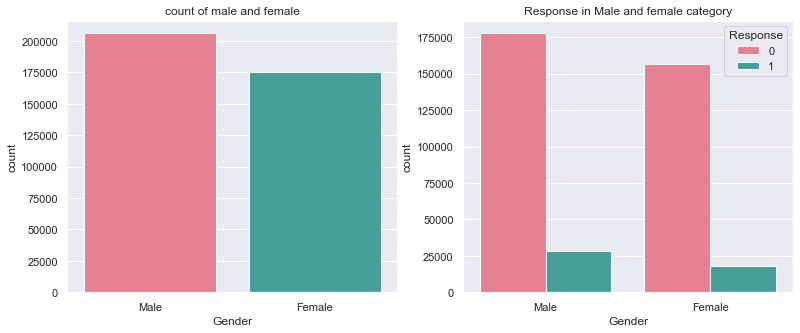

In [11]:
#gender vs responce
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

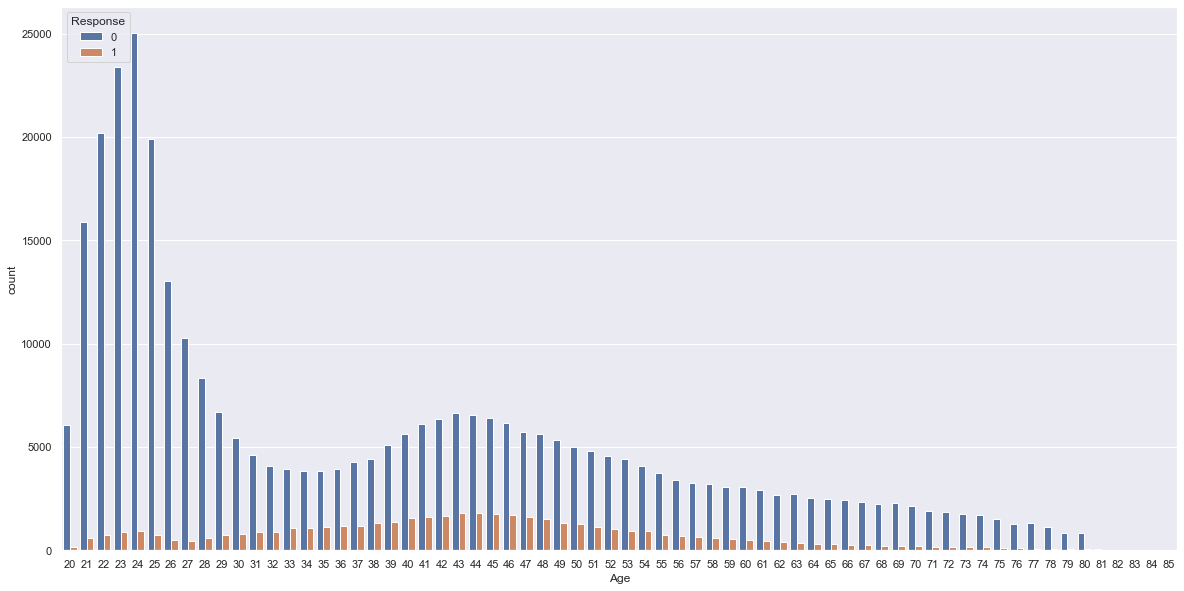

In [12]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data)


<AxesSubplot:xlabel='Age'>

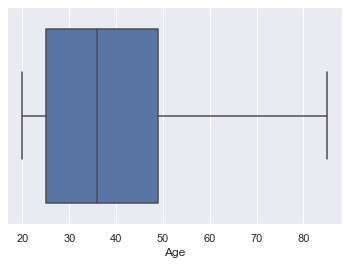

In [13]:
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

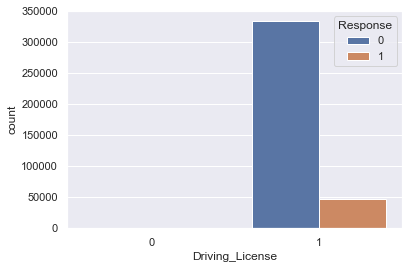

In [14]:
sns.countplot(data['Driving_License'],hue=data['Response'])

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

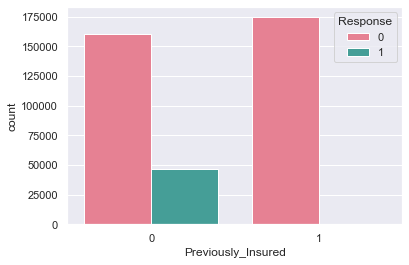

In [15]:
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='husl')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

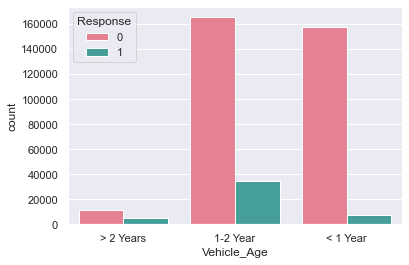

In [16]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='husl')

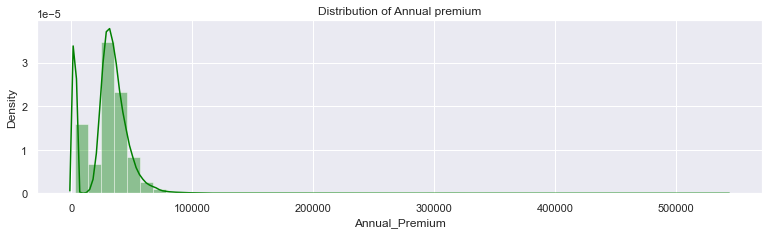

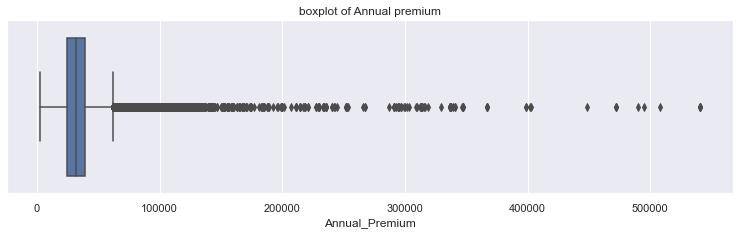

In [19]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

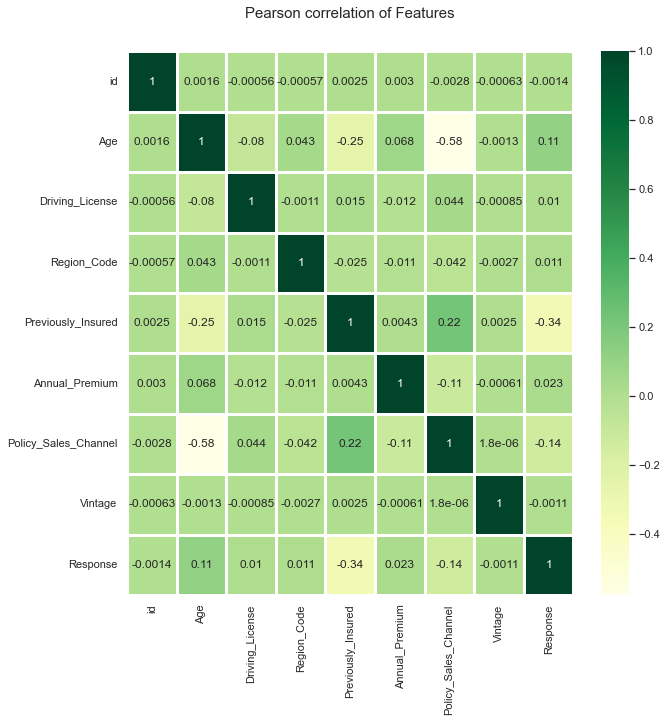

In [24]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [25]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [26]:
data.dtypes

id                        int64
Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [27]:
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


In [28]:
x=data.drop(['Response'],axis=1) #contain all  independent variable
y=data['Response']           #dependent variable

[0.19371016 0.00570817 0.13594061 0.00047223 0.09657281 0.0551417
 0.01709206 0.07427162 0.16420051 0.06925355 0.18763658]


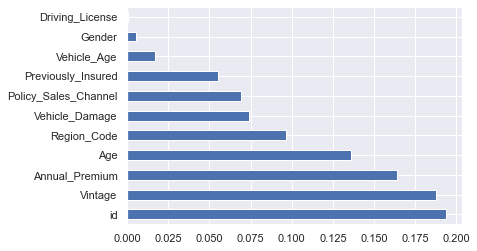

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [30]:
x=x.drop(['Driving_License','Gender'],axis=1)

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


<AxesSubplot:xlabel='Response', ylabel='count'>

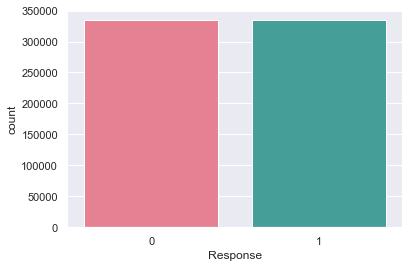

In [32]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [33]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(468158, 9) (200640, 9) (468158,) (200640,)


In [34]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7838915470494418
ROC_AUC Score: 0.8341486556420709


In [35]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61420
           1       0.98      0.70      0.82    139220

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



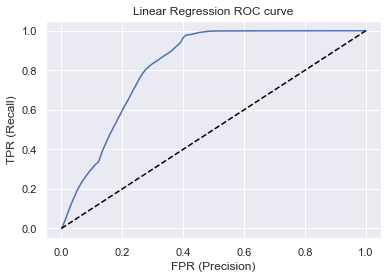

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[59194 41134]
 [ 2226 98086]]


<AxesSubplot:>

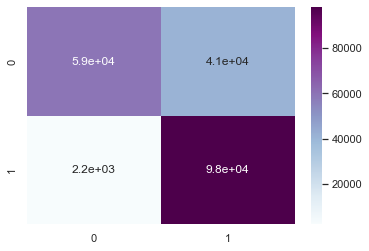

In [37]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')


In [38]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.944662081339713
ROC_AUC Score: 0.9496361320475825


In [39]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89773
           1       1.00      0.90      0.95    110867

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.94    200640



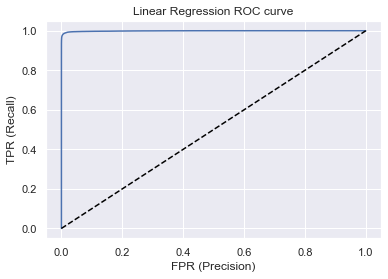

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[ 89499    274]
 [ 10829 100038]]


<AxesSubplot:>

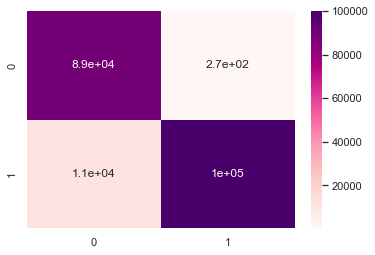

In [41]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')


In [42]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.8126594896331738
ROC_AUC Score: 0.8340717894830049


In [43]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79     74928
           1       0.94      0.75      0.83    125712

    accuracy                           0.81    200640
   macro avg       0.81      0.83      0.81    200640
weighted avg       0.84      0.81      0.82    200640



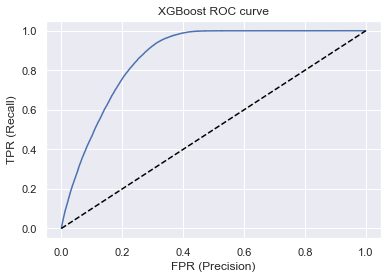

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[68834 31494]
 [ 6094 94218]]


<AxesSubplot:>

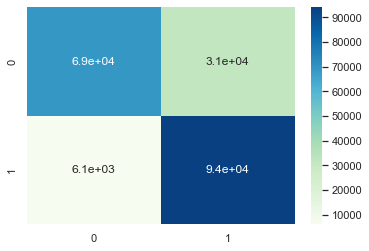

In [45]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

In [46]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783892,0.977809,0.704540,0.818980,0.834149
Randomforest,0.944662,0.997269,0.902324,0.947424,0.949636
XGBClassifier,0.812659,0.939250,0.749475,0.833699,0.834072
